# Machine Learning  -  CAC 2

# **ICICI BANK** datasets (16th may 2020 - 16th may 2024)

### Submitted by :
### Name : **Manish Kumar**
### Register number : **23122022**
### Class : **3MScDS A**

# Datasets Description

### **Context** : 

The data is the price history and trading volumes of ICICI Bank datsets from NSE (National Stock Exchange) India. The data in the dataset spans from 16th May, 2020 to 16th May, 2024.

Dataset link : https://finance.yahoo.com/quote/ICICIBANK.NS/history?period1=1589587200&period2=1715850148

### **Columns Description :**


**Date -** Trade Data: Represents the date of the trading data, indicating when the stock market activity occurred.

**Open -** Opening Price for the Day: Represents the initial price at which a stock is traded on a given day.

**High -** Highest Price for the Day: Denotes the highest trading price reached by the stock during the trading day.

**Low -** Lowest Price for the Day: Represents the lowest trading price reached by the stock during the trading day.

**Close -** Closing Price: Indicates the final trading price of the stock at the end of the trading day.

**Adj Close -** The adjusted closing price takes dividends, stock splits, and new stock offerings into account. The adjusted closing price is a more accurate indicator of stock value since it starts where the closing price finishes.

**Volume -** Volume Traded for the Day: Represents the total number of shares or contracts traded during a specific time period, typically a trading day.

## Importing Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [3]:
# Importing datasets

df = pd.read_csv("ICICIBANK.NS.csv")

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,320.000000,320.500000,293.250000,298.500000,293.437775,74034133
1,2020-05-19,307.049988,311.500000,297.100006,300.299988,295.207214,61827491
2,2020-05-20,299.000000,308.250000,297.500000,305.649994,300.466492,42238419
3,2020-05-21,306.000000,312.799988,302.000000,304.399994,299.237701,43075357
4,2020-05-22,301.000000,307.700012,285.549988,291.049988,286.114044,80358245
...,...,...,...,...,...,...,...
987,2024-05-10,1118.000000,1128.900024,1112.050049,1117.050049,1117.050049,8573656
988,2024-05-13,1112.400024,1130.650024,1106.699951,1128.000000,1128.000000,9707983
989,2024-05-14,1125.900024,1127.900024,1118.550049,1120.550049,1120.550049,8944262
990,2024-05-15,1122.099976,1127.800049,1113.500000,1124.349976,1124.349976,10743423


# Data Reading and Cleaning

In [4]:
# Printing top 10 rows
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-18,320.000000,320.500000,293.250000,298.500000,293.437775,74034133
1,2020-05-19,307.049988,311.500000,297.100006,300.299988,295.207214,61827491
2,2020-05-20,299.000000,308.250000,297.500000,305.649994,300.466492,42238419
3,2020-05-21,306.000000,312.799988,302.000000,304.399994,299.237701,43075357
4,2020-05-22,301.000000,307.700012,285.549988,291.049988,286.114044,80358245
5,2020-05-26,296.049988,297.899994,290.000000,292.700012,287.736145,46681705
6,2020-05-27,296.100006,321.950012,294.850006,318.850006,313.442627,80541990
7,2020-05-28,322.250000,329.750000,320.750000,326.850006,321.306976,66136408
8,2020-05-29,322.899994,334.299988,320.000000,331.950012,326.320496,60487477
9,2020-06-01,339.000000,348.000000,336.200012,339.250000,333.496643,44024770


In [5]:
# Printing bottom 10 rows
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
982,2024-05-03,1141.300049,1157.400024,1135.449951,1142.050049,1142.050049,19933604
983,2024-05-06,1141.550049,1158.449951,1138.099976,1146.300049,1146.300049,14970524
984,2024-05-07,1147.949951,1152.750000,1126.300049,1131.900024,1131.900024,15097728
985,2024-05-08,1126.550049,1132.000000,1116.050049,1123.000000,1123.000000,19913090
986,2024-05-09,1120.550049,1128.849976,1110.000000,1115.699951,1115.699951,12229853
987,2024-05-10,1118.000000,1128.900024,1112.050049,1117.050049,1117.050049,8573656
988,2024-05-13,1112.400024,1130.650024,1106.699951,1128.000000,1128.000000,9707983
989,2024-05-14,1125.900024,1127.900024,1118.550049,1120.550049,1120.550049,8944262
990,2024-05-15,1122.099976,1127.800049,1113.500000,1124.349976,1124.349976,10743423
991,2024-05-16,1133.000000,1136.550049,1112.800049,1119.949951,1119.949951,9256555


In [6]:
# Display the size of the dataset
df.shape

(992, 7)

In [7]:
df.columns # Column names

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# Statical summary of the datsets
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,992.000000,992.000000,992.000000,992.000000,992.000000,9.920000e+02
mean,757.685332,765.142239,749.802367,757.732510,750.642720,1.911481e+07
std,209.086206,209.784548,208.744166,209.205492,210.981280,1.270741e+07
min,296.049988,297.899994,285.549988,291.049988,286.114044,3.149310e+06
25%,631.425003,637.200012,623.937485,631.162506,620.458619,1.096530e+07
50%,767.975006,774.850006,757.774994,765.500000,754.721313,1.534312e+07
75%,927.024994,934.500000,922.387512,926.687485,922.704895,2.332102e+07
max,1159.949951,1169.550049,1146.750000,1160.150024,1160.150024,1.259394e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       992 non-null    object 
 1   Open       992 non-null    float64
 2   High       992 non-null    float64
 3   Low        992 non-null    float64
 4   Close      992 non-null    float64
 5   Adj Close  992 non-null    float64
 6   Volume     992 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 54.4+ KB


## Checking for Missing values

In [10]:
# Checking for the missing values
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Since, There are no missing values

## Histogram

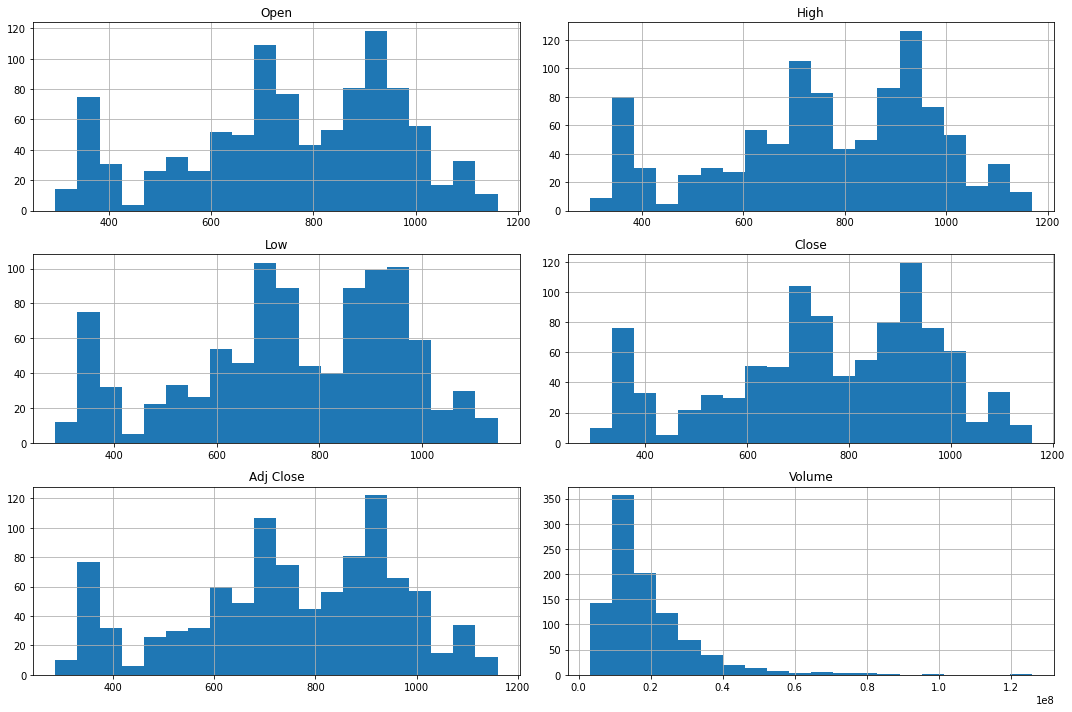

In [11]:
df.hist(bins=20, figsize=(15,10))  # Here we create histograms for each column in the DataFrame 'df'.

plt.tight_layout() # Here we Adjust the layout to prevent overlap.

plt.show() # It is used to show the histograms.

### Creating New Dataframe df1

In [12]:
df1 = df[['Adj Close']]

In [13]:
#Create one more column Prediction shifted 10 days up. 

df1['Prediction'] = df1[['Adj Close']].shift(-10)

C:\Users\Manish\AppData\Local\Temp\ipykernel_11428\1258609162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Prediction'] = df1[['Adj Close']].shift(-10)


In [14]:
#printing top 20 data set
df1.head(10)

,Adj Close,Prediction
0,293.437775,342.491486
1,295.207214,350.798187
2,300.466492,341.950836
3,299.237701,351.142273
4,286.114044,353.698120
5,287.736145,342.638947
6,313.442627,347.013489
7,321.306976,335.462769
8,326.320496,338.362762
9,333.496643,325.484894


In [15]:
#printing bottom 20 data set
df1.tail(10)

,Adj Close,Prediction
982,1142.050049,NaN
983,1146.300049,NaN
984,1131.900024,NaN
985,1123.000000,NaN
986,1115.699951,NaN
987,1117.050049,NaN
988,1128.000000,NaN
989,1120.550049,NaN
990,1124.349976,NaN
991,1119.949951,NaN


In [16]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df1.drop(['Prediction'], axis = 1))

#Remove the last 15 rows
X = X[:-10]
print(X)

[[ 293.437775]
 [ 295.207214]
 [ 300.466492]
 [ 299.237701]
 [ 286.114044]
 [ 287.736145]
 [ 313.442627]
 [ 321.306976]
 [ 326.320496]
 [ 333.496643]
 [ 342.491486]
 [ 350.798187]
 [ 341.950836]
 [ 351.142273]
 [ 353.69812 ]
 [ 342.638947]
 [ 347.013489]
 [ 335.462769]
 [ 338.362762]
 [ 325.484894]
 [ 337.133911]
 [ 336.150879]
 [ 346.030457]
 [ 357.630341]
 [ 361.316711]
 [ 369.770874]
 [ 342.196625]
 [ 345.047394]
 [ 343.179626]
 [ 337.281372]
 [ 345.489777]
 [ 357.876068]
 [ 356.696472]
 [ 354.877808]
 [ 355.713409]
 [ 369.672577]
 [ 362.692993]
 [ 364.069244]
 [ 354.238831]
 [ 347.603302]
 [ 339.68985 ]
 [ 339.935577]
 [ 338.805084]
 [ 347.799896]
 [ 356.843903]
 [ 372.375916]
 [ 374.636963]
 [ 385.597839]
 [ 375.325073]
 [ 352.420227]
 [ 346.128754]
 [ 345.096527]
 [ 339.100037]
 [ 340.91861 ]
 [ 337.428833]
 [ 345.047394]
 [ 346.227051]
 [ 352.665985]
 [ 351.879547]
 [ 357.384583]
 [ 361.120117]
 [ 360.628601]
 [ 361.808228]
 [ 355.271027]
 [ 354.09137 ]
 [ 363.282806]
 [ 368.099

In [17]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df1['Prediction'])
# Remove Last 10 rows
y = y[:-10]
print(y)

[ 342.491486  350.798187  341.950836  351.142273  353.69812   342.638947
  347.013489  335.462769  338.362762  325.484894  337.133911  336.150879
  346.030457  357.630341  361.316711  369.770874  342.196625  345.047394
  343.179626  337.281372  345.489777  357.876068  356.696472  354.877808
  355.713409  369.672577  362.692993  364.069244  354.238831  347.603302
  339.68985   339.935577  338.805084  347.799896  356.843903  372.375916
  374.636963  385.597839  375.325073  352.420227  346.128754  345.096527
  339.100037  340.91861   337.428833  345.047394  346.227051  352.665985
  351.879547  357.384583  361.120117  360.628601  361.808228  355.271027
  354.09137   363.282806  368.099731  361.513336  364.855682  373.899628
  379.797913  382.747009  385.548706  402.751923  387.90799   384.319885
  385.7453    376.258972  366.231934  367.067505  369.328522  361.365875
  364.41333   364.216705  357.532013  365.248871  368.34549   362.742126
  363.282806  344.752502  348.38974   345.882996  3

## Data Splitting

In [18]:
# Split the data into train and test with 80 & 20 % respectively

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVR Model with kernel RBF

## Model Fitting

In [19]:
# SVM Model
svr = SVR(kernel='rbf', C=3e3, gamma=0.00001)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=3000.0, gamma=1e-05)

### Accuracy of the model

In [20]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9733547388170775


**Accuracy of the Model is 97%**

In [21]:
forecast = np.array(df1.drop(['Prediction'],axis=1))[-10:]
print(forecast)

[[1142.050049]
 [1146.300049]
 [1131.900024]
 [1123.      ]
 [1115.699951]
 [1117.050049]
 [1128.      ]
 [1120.550049]
 [1124.349976]
 [1119.949951]]


## Prediction

In [22]:
# support vector model predictions for the next ‘15’ days
svm_prediction = svr.predict(forecast)
print(svm_prediction)

[1148.77078503 1152.72395966 1139.02898486 1130.19237884 1122.78015493
 1124.16063054 1135.18693825 1127.71954837 1131.54802447 1127.11147371]


### Actual and predicted values

In [23]:
dataframe = pd.DataFrame({'Actual':forecast.flatten(),'predicted':svm_prediction.flatten()})
dataframe.tail(20)

,Actual,predicted
0,1142.050049,1148.770785
1,1146.300049,1152.723960
2,1131.900024,1139.028985
3,1123.000000,1130.192379
4,1115.699951,1122.780155
5,1117.050049,1124.160631
6,1128.000000,1135.186938
7,1120.550049,1127.719548
8,1124.349976,1131.548024
9,1119.949951,1127.111474


### MAE, MSE, RMSE, R-square

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
# Printout relevant metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(forecast, svm_prediction))
print("Mean squared Error:",metrics.mean_squared_error(forecast, svm_prediction))
print("root mean squared Error:",np.sqrt(metrics.mean_squared_error(forecast, svm_prediction)))
print("R Square Score is :",r2_score(forecast, svm_prediction))

Mean Absolute Error: 7.037278067161514
Mean squared Error: 49.58300869036435
root mean squared Error: 7.041520339412814
R Square Score is : 0.48613009505872506


 **SVR Model**
   - **MAE** = **7.03**
   - **MSE** = **49.58**
   - **RMSE** = **7.04**
   - **R-square score** = **0.48**

Root Mean Square Error (RMSE) measures the average deviation of the predicted values from the actual values. R² Score (coefficient of determination) measures the proportion of the variance in the dependent variable (median house value) that is predictable from the independent variables. R² score ranges from 0 to 1, with higher values indicating better fit.

**Best Configuration = Lower RMSE and higher R-square score**

## Evaluation Metrics

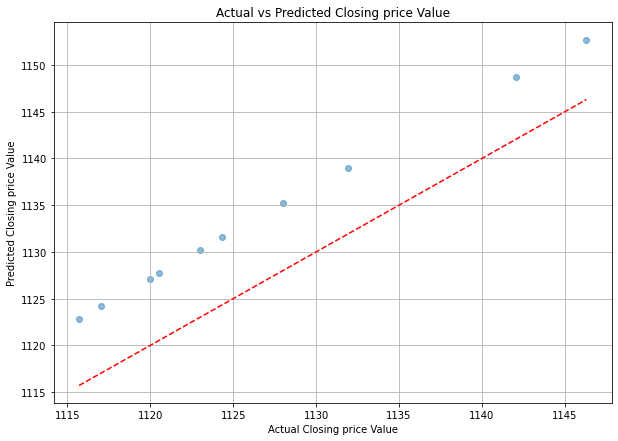

In [25]:
# Plotting the predicted line and scatter plot of y_test values
plt.figure(figsize=(10, 7))
plt.scatter(forecast, svm_prediction, alpha=0.5)
plt.plot([min(forecast), max(forecast)], [min(forecast), max(forecast)], color='red', linestyle='--')
plt.xlabel('Actual Closing price Value')
plt.ylabel('Predicted Closing price Value')
plt.title('Actual vs Predicted Closing price Value')
plt.grid(True)
plt.show()

## Plotting the Actual and Predicted Prices for ICICI BANK Stocks

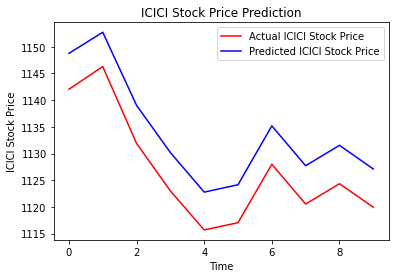

In [26]:
plt.plot(forecast, color = 'red', label = 'Actual ICICI Stock Price')
plt.plot(svm_prediction, color = 'blue', label = 'Predicted ICICI Stock Price')
plt.title('ICICI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ICICI Stock Price')
plt.legend()

## Interpretation

**With an RMSE of 7.04 and an R² of 0.48 using SVR with the RBF kernel, the model's predictive accuracy is relatively moderate.**